# Fundamentos OpenCV

![img](https://i.imgur.com/7ZSgOoZ.png)

**[OpenCV](https://opencv.org/)** (**Open Source Computer Vision Library**) é uma biblioteca de funções de programação voltada principalmente para a visão computacional em tempo real. Originalmente desenvolvido pela Intel, foi posteriormente suportado pela Willow Garage e então pela Itseez (que mais tarde foi adquirida pela Intel). A biblioteca é multiplataforma e gratuita para uso sob a licença Apache 2 de código aberto.

A biblioteca tem mais de 2.500 algoritmos otimizados, que incluem um conjunto abrangente de algoritmos de visão computacional e machine learning clássicos e de última geração. Esses algoritmos podem ser usados para detectar e reconhecer rostos, identificar objetos, classificar ações humanas em vídeos, rastrear movimentos de câmera, rastrear objetos em movimento, extrair modelos 3D de objetos, produzir nuvens de pontos 3D de câmeras estéreo, juntar imagens para produzir uma imagem de alta resolução de uma cena inteira, encontre imagens semelhantes em um banco de dados de imagens, remova olhos vermelhos de imagens tiradas com flash, siga os movimentos dos olhos, reconheça o cenário e estabeleça marcadores para sobrepô-lo com realidade aumentada, etc.

Mais detalhes no [site oficial](https://opencv.org/about/) e na [documentação](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html).

Este notebook aborda a abertura de arquivos, a visualização de pixels e algumas técnicas simples de processamento de imagem.

Usaremos a seguinte imagem como exemplo, do artista **José Clemente Orozco**. Mas você pode usar a imagem que desejar.

![img](https://i.imgur.com/zvcR6I4.jpg)

## Iniciando

Primeiro, precisamos importar as bibliotecas relevantes: o próprio OpenCV, Numpy e Matplotlib. 

In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import cv2 

Agora podemos abrir uma imagem:

In [2]:
imagem = cv2.imread('imagens/orozco.jpg')

Podemos descobrir várias informações sobre essa imagem que carregamos:

In [3]:
print(f'Tamanho da imagem: {imagem.size}')
print(f'Dimensão da imagem: {imagem.shape}')
print(f'Tipos de dados: {imagem.dtype}')

Tamanho da imagem: 793800
Dimensão da imagem: (378, 700, 3)
Tipos de dados: uint8


O último atributo (tipo de dados) é uma das coisas complicadas sobre como trabalhar em Python. Como não é fortemente tipado, o Python permitirá que você tenha arrays de tipos diferentes, mas do mesmo tamanho, e algumas funções retornarão arrays de tipos que você provavelmente não deseja. Ser capaz de verificar e inspecionar o tipo de dados dessa maneira é muito útil e nos ajuda no **debugging**.

Podemos agora apresentar a imagem com a biblioteca Matplotlib.

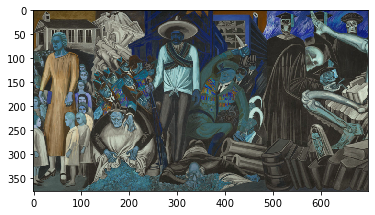

In [4]:
plt.imshow(imagem);

Também podemos apresentar sem os eixos X e Y:

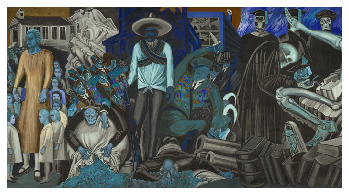

In [5]:
plt.imshow(imagem)
plt.axis('off');

O que isso ilustra é algo fundamental sobre o OpenCV: ele não armazena imagens no formato **RGB**, mas no formato **BGR**.

Para vermos as cores corretas, vamos usar o seguinte comando:

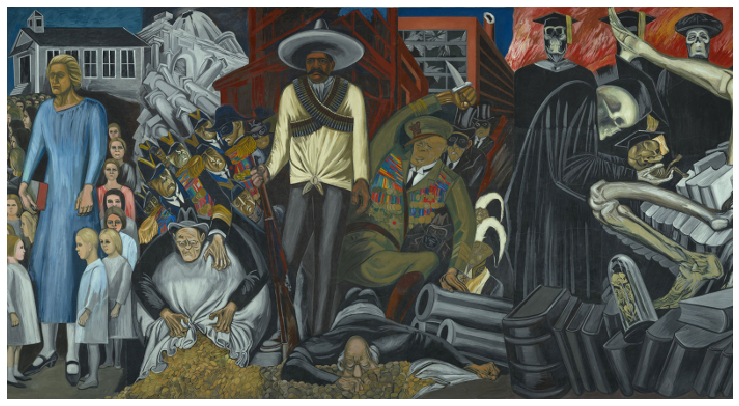

In [6]:
plt.figure(figsize=(13,8))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis('off');

Também podemos dividir os canais de cores da imagem:

- (**R** = RED = Vermelho)
- (**G** = Green = Verde)
- (**B** = Blue = Azul)

In [7]:
R, G, B = cv2.split(imagem)

zeros = np.zeros(B.shape, np.uint8)
blueBGR = cv2.merge((zeros,zeros,B))
greenBGR = cv2.merge((zeros,G,zeros))
redBGR = cv2.merge((R,zeros,zeros))

E agora podemos apresentar apenas um canal de cor da imagem, neste caso vamos mostrar o **vermelho**.

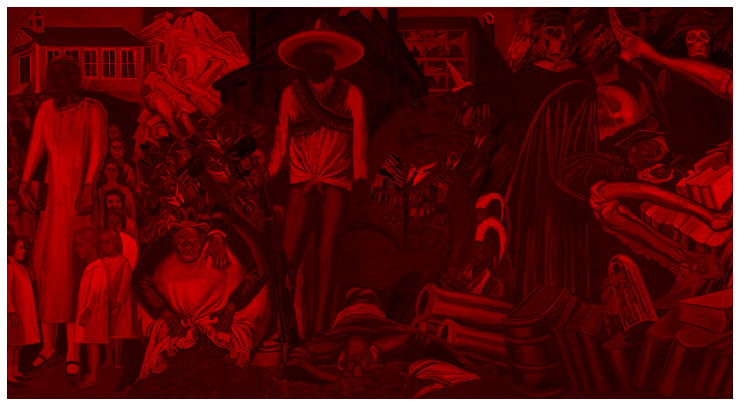

In [8]:
plt.figure(figsize=(13,8))
plt.imshow(redBGR)
plt.axis('off');

Também podemos apresentar a imagem apenas em escala de cinza.

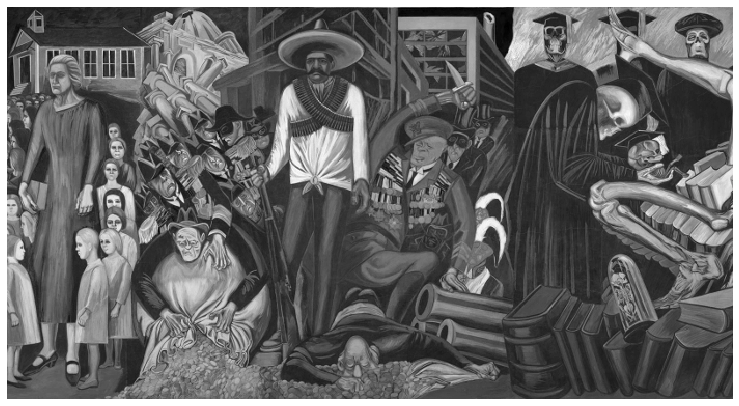

In [9]:
plt.figure(figsize=(13,8))
plt.imshow(B, cmap='gray')
plt.axis('off');

## Obtendo Dados da Imagem e Definindo Dados da Imagem

As imagens em Python-OpenCV são arrays NumPy. 

Os arrays NumPy são otimizados para operações rápidas de array e, portanto, geralmente existem métodos rápidos para fazer cálculos de array que, na verdade, não envolvem escrever todos os detalhes nós mesmos. Portanto, geralmente é uma prática ruim acessar pixels individuais, embora seja possível.

In [10]:
pixel = imagem[100,100]
print(pixel)

[40 38 37]


Sendo assim, podemos alterar os pixels individualmente:

In [11]:
imagem[100,100] = [0,0,0]
pixelnew = imagem[100,100]
print(pixelnew)

[0 0 0]


## Obter e Definir Regiões de uma Imagem

Da mesma forma que podemos obter ou definir pixels individuais, podemos obter ou definir regiões de uma imagem. 

Essa é uma maneira particularmente útil de fazer com que possamos trabalhar com uma região da imagem.

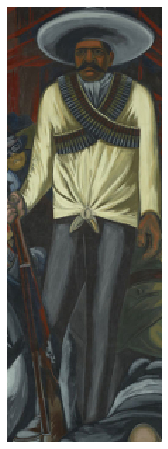

In [12]:
região = imagem[20:330, 240:350]
região_rgb = cv2.cvtColor(região, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,8))
plt.imshow(região_rgb)
plt.axis('off');

## Histograma da Imagem

"Um histograma de imagem é um tipo de histograma que atua como uma representação gráfica da distribuição tonal em uma imagem digital. Ele plota o número de pixels para cada valor tonal. Ao observar o histograma de uma imagem específica, o visualizador será capaz de julgar toda a distribuição tonal num relance."

1. O histograma é uma representação gráfica da distribuição da intensidade de uma imagem.
2. O histograma quantifica o número de pixels para cada valor de intensidade.

A seguir temos o código para plotar um histograma de nossa imagem em escala de cinza:

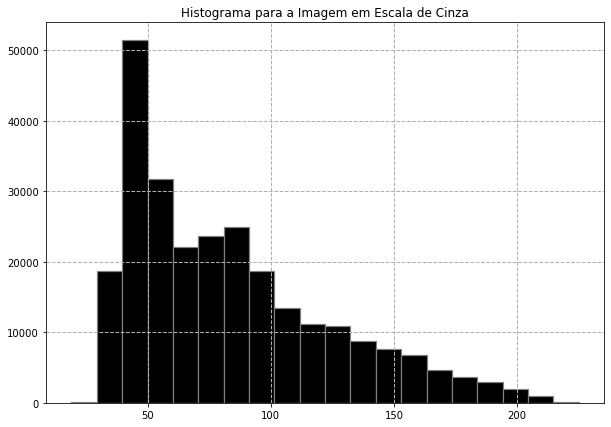

In [13]:
gray_img = cv2.imread('imagens/orozco.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.figure(figsize=(10,7))
plt.grid(linestyle='--', linewidth=1)
plt.hist(gray_img.ravel(),bins=20,color='k',edgecolor='gray',linewidth=1.2)
plt.title('Histograma para a Imagem em Escala de Cinza');

Também podemos apresentar um histograma da distribuição de cores RGB em nossa imagem:

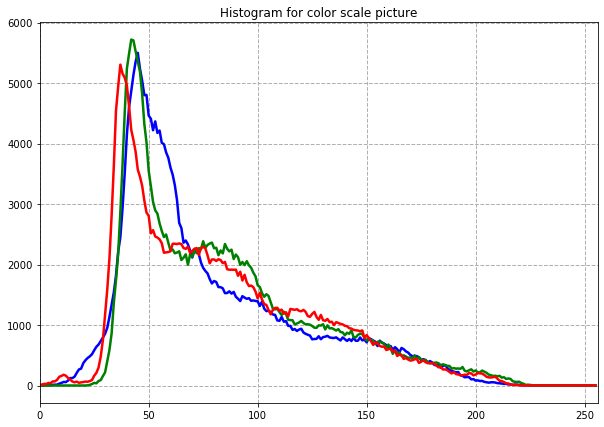

In [14]:
img = cv2.imread('imagens/orozco.jpg', -1)

color = ('b','g','r')
plt.figure(figsize=(10,7))
plt.grid(linestyle='--', linewidth=1)
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color=col,lw=2.5)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture');

## Operações Básicas em Imagens

Podemos desenhar objetos em uma imagem com os seguintes métodos:

- cv2.line(image, startPoint, endPoint, rgb, thinkness)
- cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
- cv2.circle(image, center, radius, rgb, thinkness)
- cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)

Vamos construir uma imagem preta para usarmos como exemplo:

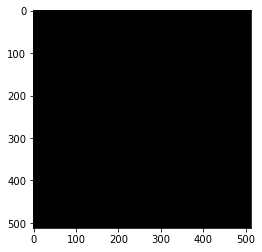

In [15]:
img = np.zeros((512,512,3), np.uint8)
plt.imshow(img); 

- Podemos desenhar uma linha usando **cv2.line**
- Podemos desenhar um retângulo usando **cv2.rectangle**
- Podemos desenhar um círculo usando **cv2.circle**
- Podemos desenhar uma elipse usando **cv2.ellipse**

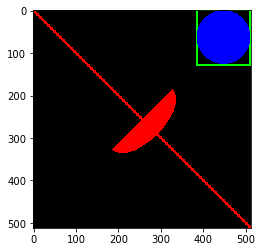

In [16]:
cv2.line(img, (0,0), (511,511), (255,0,0), 5)
cv2.rectangle(img, (384,0), (510,128), (0,255,0), 3)
cv2.circle(img, (447,63), 63, (0,0,255), -1)
cv2.ellipse(img, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
plt.imshow(img);

Também podemos desenhar uma linha usando **cv2.polylines**:

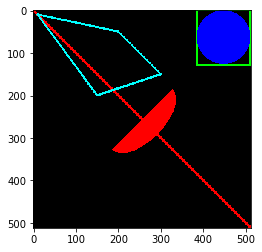

In [17]:
pts = np.array([[10,10],[150,200],[300,150],[200,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255),3)
plt.imshow(img);

É possível adicionar texto usando **cv2.putText**, por exemplo:

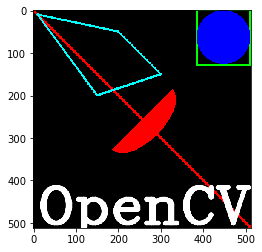

In [18]:
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
plt.imshow(img);